In [1]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pymysql
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
connection = pymysql.connect(host = "localhost",
                             user = "root",
                             password = "Kivi@11",
                             database = "minicapstone")
connection

In [5]:
query = "select * from crime_data"
df = pd.read_sql(query,connection)
df.head()

C:\Users\Shilpa\AppData\Local\Temp\ipykernel_15364\3314618473.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,connection)


,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26


# 1.Where are the geographical hotspots for reported crimes?
 

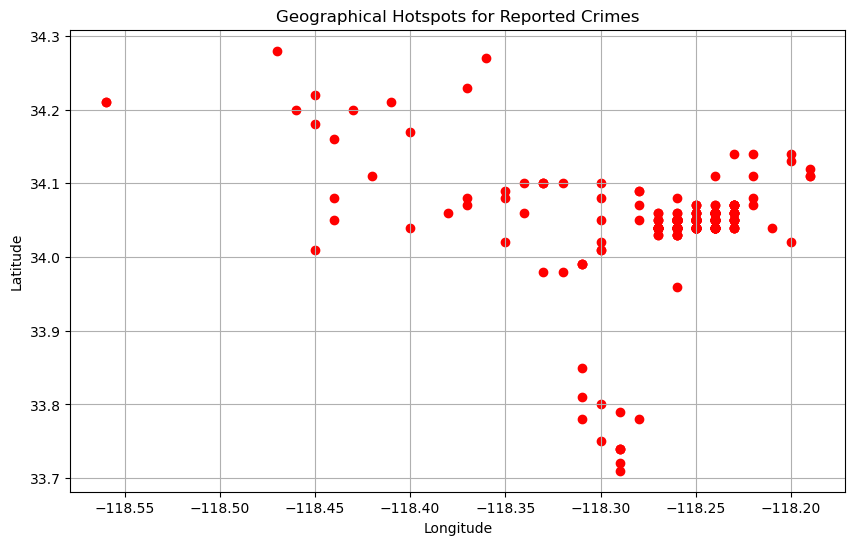

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df['LON'], df['LAT'], color='red')
plt.title('Geographical Hotspots for Reported Crimes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# CONCLUSION
1.Clusters of red markers on the plot suggest that the  geographical areas with a higher concentration of reported crimes.



# 2.What is the distribution of victim ages in reported crimes?

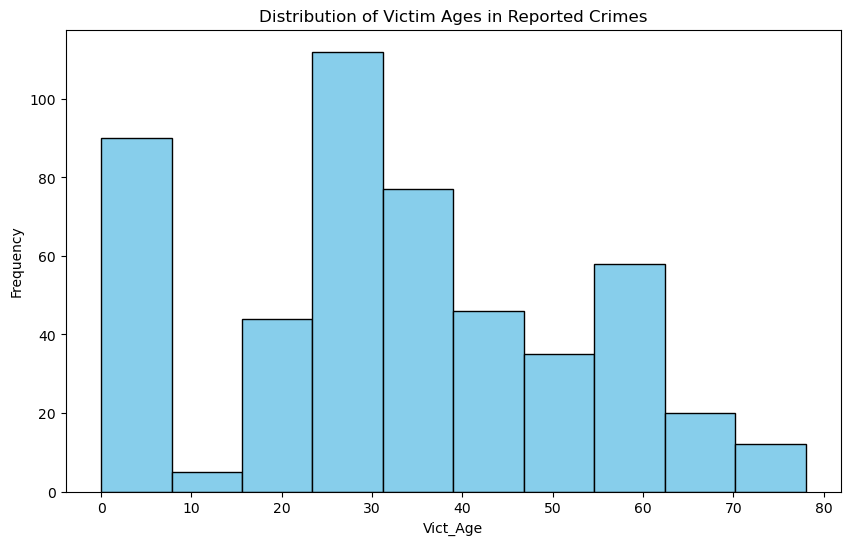

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(x = df['Vict_Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Victim Ages in Reported Crimes')
plt.xlabel('Vict_Age')
plt.ylabel('Frequency')
plt.show()

# CONCLUSION
1. The x-axis represents the range of values (in this case, victim ages)
2. I label the y-axis as 'Frequency', it indicates that the heights of the bars 
   in the histogram represent the number of occurrences of victim ages in the specified bins.
3. Most of the victims are found at the age 30. 


  

# 3.Is there a significant difference in crime rates between male and female victims?

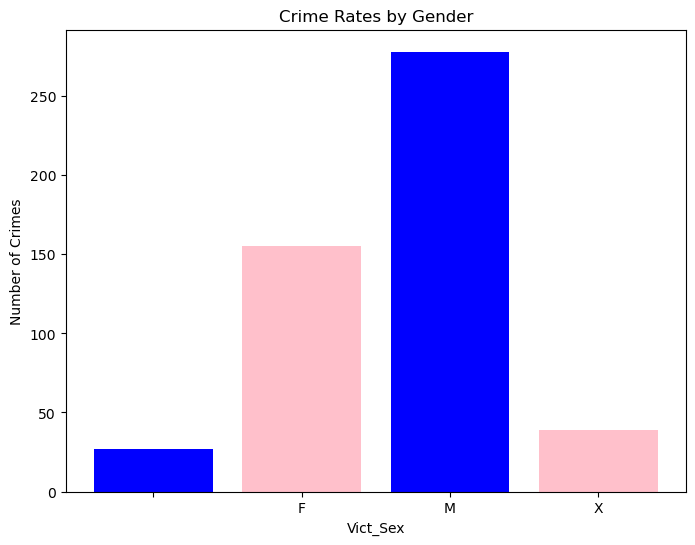

In [45]:
crime_by_gender = df.groupby('Vict_Sex')['DR_NO'].count().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(crime_by_gender['Vict_Sex'], crime_by_gender['DR_NO'], color=['blue', 'pink'])
plt.title('Crime Rates by Gender')
plt.xlabel('Vict_Sex')
plt.ylabel('Number of Crimes')
plt.show()

# CONCLUSION
1. Above code represents the  visualization of  crime rates based on gender using a bar chart.
2. I grouped the DataFrame (df) by the 'Vict_Sex' column and counts the number of occurrences for each gender using the 'DR_NO' column.
3. this visualization showing a comparison of crime rates between different genders
4. My choice of colors (blue and pink)
5. What I understand by the above graph  is that the crime rates are higher for males than for females. 




# 4.Where do most crimes occur based on the "Location" column?

In [46]:
location_counts = df['Location'].value_counts()
print("Top locations for crimes:")
print(location_counts.head())

Top locations for crimes:
Location
800 N ALAMEDA ST      14
700 W 7TH ST          11
1100 S FIGUEROA ST     6
300 E 5TH ST           6
6TH                    6
Name: count, dtype: int64


#  Below code shows the graphical representation of the same code:

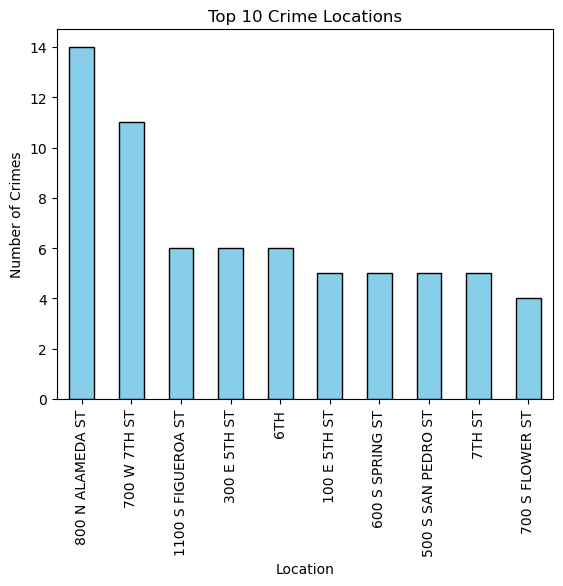

In [50]:
location_counts = df['Location'].value_counts()
top_locations = location_counts.head(10)
top_locations.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Crime Locations')
plt.xlabel('Location')
plt.ylabel('Number of Crimes')
plt.show()

# conclusion
1. Based on the above bar chart, Most crimes are occured  location is 800 N ALAMEDA ST.

# 5.What is the distribution of reported crimes based on Crime Code?

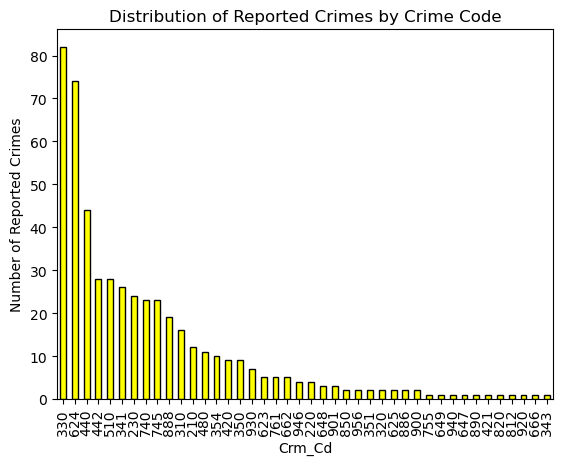

In [60]:
crime_code_distribution = df['Crm_Cd'].value_counts()
crime_code_distribution.plot(kind='bar', color='yellow', edgecolor='black')
plt.title('Distribution of Reported Crimes by Crime Code')
plt.xlabel('Crm_Cd')
plt.ylabel('Number of Reported Crimes')
plt.show()

# conclusion of barplot 
1. After looking at Burpilot above, I understand that 330 crime code has the highest number of crime records.

# using pie chart 

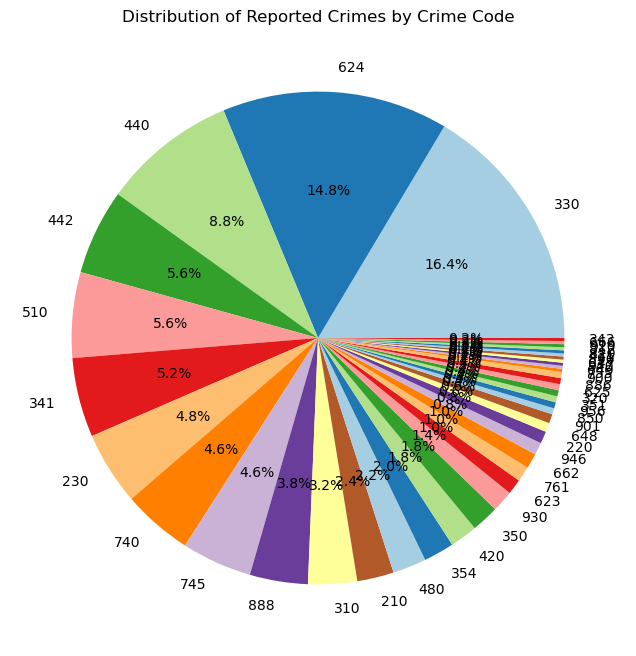

In [56]:
crime_code_distribution = df['Crm_Cd'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(crime_code_distribution, labels=crime_code_distribution.index, autopct='%1.1f%%',colors=plt.cm.Paired.colors)
plt.title('Distribution of Reported Crimes by Crime Code')
plt.show()

# CONCLUSION 
1. The above visualization shows the distribution of reported crimes based on the Crime Code using a pie chart.
2. at 330 crime code,The more number of reported crimes are high compared to other crimes.  